In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification

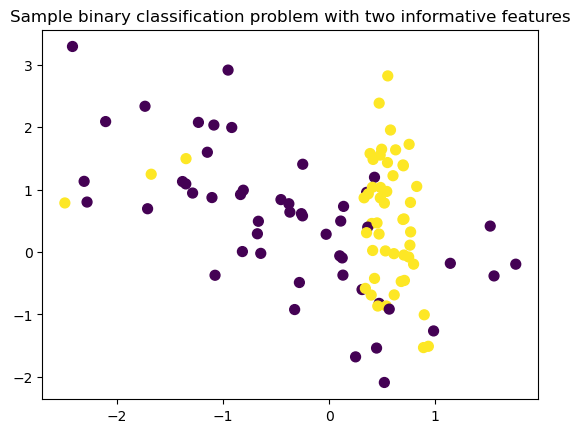

In [2]:
X_C2, y_C2 = make_classification(n_samples = 100, n_features = 2, n_redundant = 0,
                                 n_informative =2, n_clusters_per_class = 1, flip_y = 0.2,
                                 class_sep = 0.6, random_state = 0)

plt.figure()
plt.title('Sample binary classification problem with two informative features')
plt.scatter(X_C2[:,0], X_C2[:,1], c = y_C2, marker = 'o', s = 50)
plt.show()

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)

In [4]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 70)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=70)

In [5]:
aa = knn.score(X_train, y_train)
bb = knn.score(X_test, y_test)
print('the score of train set is {} and test set is {}.'.format(aa,bb))

the score of train set is 0.52 and test set is 0.44.


([<matplotlib.axis.XTick at 0x1c0d63e6820>,
 [Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20')])

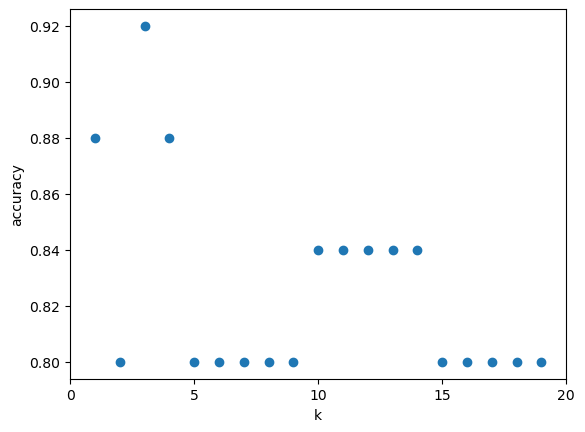

In [6]:
k_range = range(1,20)

scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
    
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

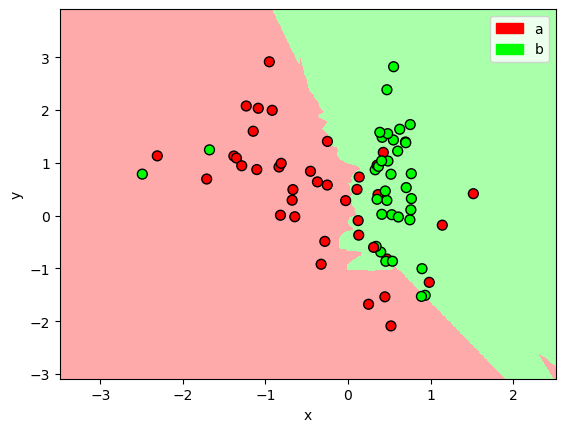

In [7]:
from matplotlib import patches

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold  = ListedColormap(['#FF0000', '#00FF00'])
mesh_step_size = .01  # step size in the mesh
plot_symbol_size = 50

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),np.arange(y_min, y_max, mesh_step_size))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]) # create a prediction for all points in the meshgrid of (x_min,x_max)
#and (y_min,y_max)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot training points
plt.scatter(X_train[:, 0], X_train[:, 1], s=plot_symbol_size, c=y_train, cmap=cmap_bold, edgecolor = 'black')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

patch0 = patches.Patch(color='#FF0000', label='a')
patch1 = patches.Patch(color='#00FF00', label='b')
plt.legend(handles=[patch0, patch1])

plt.xlabel('x')
plt.ylabel('y')

plt.show()

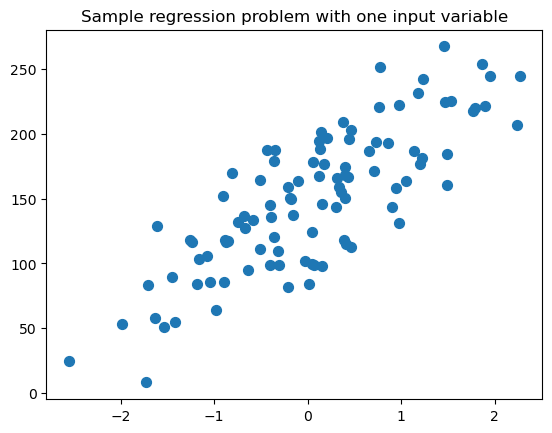

In [8]:
from sklearn.datasets import make_regression

plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features = 1, n_informative = 1,
                            bias = 150.0, noise = 30, random_state = 0)

plt.scatter(X_R1, y_R1, marker = 'o', s=50)
plt.show()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)
from sklearn.neighbors import KNeighborsRegressor

knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_train, y_train)
print('y predict, Y real')
for n in zip(knnreg.predict(X_test),y_test):
    print('{:.3f}'.format(n[0]),',','{:.3f}'.format(n[1]))
print('R-squared test score:{:.3f}'.format(knnreg.score(X_test,y_test)))

y predict, Y real
231.710 , 245.102
148.356 , 136.064
150.589 , 150.564
150.589 , 174.288
72.149 , 57.583
166.506 , 145.704
141.906 , 149.873
235.571 , 184.405
208.259 , 186.769
102.105 , 103.445
191.319 , 143.605
134.500 , 95.269
228.322 , 160.219
148.356 , 99.055
159.169 , 166.521
113.469 , 85.724
144.036 , 187.933
199.232 , 220.998
143.192 , 209.374
166.506 , 196.698
231.710 , 206.672
208.259 , 176.417
128.015 , 169.905
123.142 , 131.598
141.906 , 81.581
R-squared test score:0.425


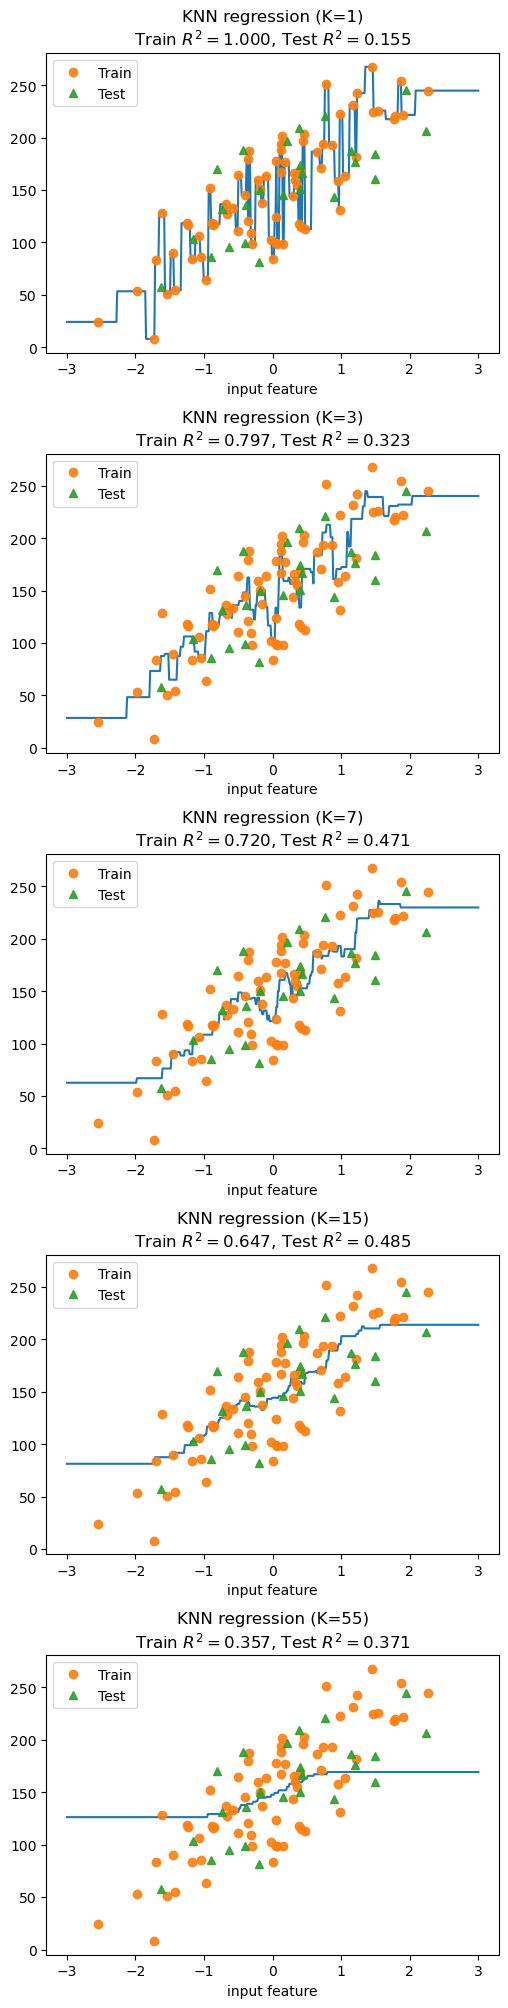

In [10]:
fig, subaxes = plt.subplots(5,1,figsize=[5,20])
X_predict_input = np.linspace(-3,3,500).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)

for thisaxis, K in zip(subaxes,[1,3,7,15,55]):
    knnreg = KNeighborsRegressor(n_neighbors=K).fit(X_train,y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    train_score = knnreg.score(X_train, y_train)
    test_score = knnreg.score(X_test, y_test)
    thisaxis.plot(X_predict_input, y_predict_output)
    thisaxis.plot(X_train, y_train, 'o', alpha=0.9,label='Train')
    thisaxis.plot(X_test, y_test, '^', alpha=0.9,label='Test')
    thisaxis.set_xlabel('input feature')
    thisaxis.set_title('KNN regression (K={})\nTrain $R^2 = {:.3f}$, Test $R^2 = {:.3f}$'.format(K,train_score,test_score))
    thisaxis.legend()
    plt.tight_layout(pad=0.4,w_pad=0.5,h_pad=1.0)

In [11]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression().fit(X_train,y_train)

print((linreg.coef_[0],linreg.intercept_)) # w (w0) and b

(45.708704645536564, 148.44575345658873)


In [12]:
def load_crime_dataset():
    # Communities and Crime dataset for regression
    # https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized

    crime = pd.read_table('assets/CommViolPredUnnormalizedData.txt', sep=',', na_values='?')
    crime.head()
    # remove features with poor coverage or lower relevance, and keep ViolentCrimesPerPop target column
    columns_to_keep = [5, 6] + list(range(11,26)) + list(range(32, 103)) + [145]
    crime = crime.iloc[:,columns_to_keep].dropna()
    crime.head()
    X_crime = crime.iloc[:,range(0,88)]
    y_crime = crime['ViolentCrimesPerPop']

    return (X_crime, y_crime)


In [13]:
from sklearn.linear_model import Ridge
(X_crime, y_crime) = load_crime_dataset()

X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state=0)
linridge = Ridge(alpha=20.0).fit(X_train, y_train)
print((linridge.coef_,linridge.intercept_,linridge.score(X_train,y_train),linridge.score(X_test,y_test)))

(array([ 1.95091438e-03,  2.19322667e+01,  9.56286607e+00, -3.59178973e+01,
        6.36465325e+00, -1.96885471e+01, -2.80715856e-03,  1.66254486e+00,
       -6.61426604e-03, -6.95450680e+00,  1.71944731e+01, -5.62819154e+00,
        8.83525114e+00,  6.79085746e-01, -7.33614221e+00,  6.70389803e-03,
        9.78505502e-04,  5.01202169e-03, -4.89870524e+00, -1.79270062e+01,
        9.17572382e+00, -1.24454193e+00,  1.21845360e+00,  1.03233089e+01,
       -3.78037278e+00, -3.73428973e+00,  4.74595305e+00,  8.42696855e+00,
        3.09250005e+01,  1.18644167e+01, -2.05183675e+00, -3.82210450e+01,
        1.85081589e+01,  1.52510829e+00, -2.20086608e+01,  2.46283912e+00,
        3.29328703e-01,  4.02228467e+00, -1.12903533e+01, -4.69567413e-03,
        4.27046505e+01, -1.22507167e-03,  1.40795790e+00,  9.35041855e-01,
       -3.00464253e+00,  1.12390514e+00, -1.82487653e+01, -1.54653407e+01,
        2.41917002e+01, -1.32497562e+01, -4.20113118e-01, -3.59710660e+01,
        1.29786751e+01, 

In [14]:
linreg = LinearRegression().fit(X_train,y_train)

print((linreg.coef_,linreg.intercept_,linreg.score(X_train,y_train),linreg.score(X_test,y_test),np.sum(linridge.coef_ != 0))) # w (w0) and b

(array([ 1.61892346e-03, -9.43009110e+01,  1.36067510e+01, -3.13380670e+01,
       -8.15482721e-02, -1.69455128e+01, -2.42730375e-03,  1.53013232e+00,
       -1.39193248e-02, -7.72112833e+00,  2.28112354e+01, -5.65708295e+00,
        9.34751364e+00,  2.06969566e-01, -7.43413626e+00,  9.65856476e-03,
        4.38030290e-03,  4.79754625e-03, -4.46469212e+00, -1.60907140e+01,
        8.82778012e+00, -5.06734503e-01, -1.42198055e+00,  8.17551991e+00,
       -3.87048268e+00, -3.54209213e+00,  4.48758304e+00,  9.30645715e+00,
        1.73644996e+02,  1.18220766e+01,  1.51120836e+02, -3.29613007e+02,
       -1.35343395e+02,  6.95380108e-01, -2.38369008e+01,  2.77038981e+00,
        3.82248925e-01,  4.38813358e+00, -1.06410851e+01, -4.92294176e-03,
        4.14031827e+01, -1.16206866e-03,  1.18568968e+00,  1.75418465e+00,
       -3.68283678e+00,  1.59679443e+00, -8.42180230e+00, -3.79703897e+01,
        4.74076990e+01, -2.50768374e+01, -2.88246410e-01, -3.65633234e+01,
        1.89516080e+01, 

0.6731208442568581


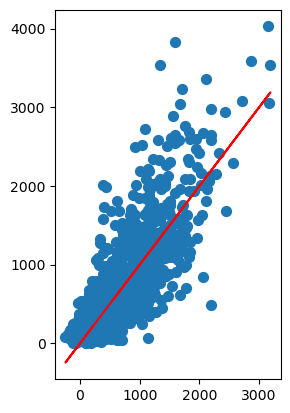

In [31]:
linreg_yp = LinearRegression().fit(linreg.predict(X_train).reshape(-1,1),y_train)

plt.figure()
plt.subplot(121)
plt.scatter(linreg.predict(X_train).reshape(-1,1),y_train,s=50)
plt.plot(linreg.predict(X_train).reshape(-1,1), linreg_yp.coef_ * linreg.predict(X_train).reshape(-1,1) + linreg_yp.intercept_, 'r-')
print(linreg_yp.score(linreg.predict(X_train).reshape(-1,1),y_train))

In [55]:
from sklearn.preprocessing import MinMaxScaler

X_train_scaled = MinMaxScaler().fit(X_crime).transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = MinMaxScaler().fit(X_crime).transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled)


F:\Program Files\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


0.0

In [57]:
linridge2 = Ridge(alpha=20.0).fit(X_train_scaled, y_train)
print((linridge2.coef_,linridge2.intercept_,linridge2.score(X_train_scaled,y_train),linridge2.score(X_test_scaled,y_test)))

(array([ 6.87760188e+01,  1.25582422e+01, -5.04178736e+01, -8.39364743e+01,
       -6.92587072e+01, -5.42077628e+00,  6.83461940e+01,  1.55663395e+02,
        1.70896273e+01, -2.80219432e+01, -4.18164830e+01, -1.92266371e+02,
       -9.46443941e+00,  1.15087305e+02, -7.79923726e+01, -1.61742522e+00,
        3.39718969e+01,  6.61735679e+01,  5.96650891e+01, -6.02115075e+01,
        1.09503073e+02,  1.48650104e+00,  8.97216044e+00, -4.12966580e+00,
       -1.06765752e+02, -3.95364234e+01, -1.06791184e+01,  2.86836011e+01,
        1.75342830e+02,  1.05555273e+02,  8.11497753e+01,  1.33900464e+02,
        9.54534260e+01, -3.40821373e+02, -4.55846536e+02, -2.83300514e+02,
       -2.62522616e+02,  1.46430497e+01, -1.06996527e+02,  6.56428139e+01,
        5.44348610e+02,  4.02558585e+01,  3.67297757e+00, -3.09364642e+01,
       -2.93239591e+00,  5.59795982e+01,  1.30858611e+01,  2.14664304e+01,
        4.82335066e+01,  6.35961733e+01,  6.65885680e+01, -5.14752670e+01,
        1.19711298e+02, 

In [58]:
linreg2 = LinearRegression().fit(X_train_scaled,y_train)

print((linreg2.coef_,linreg2.intercept_,linreg2.score(X_train_scaled,y_train),linreg2.score(X_test_scaled,y_test),np.sum(linridge.coef_ != 0))) # w (w0) and b

(array([ 1.18384733e+04, -3.47027352e+02,  6.77888333e+02, -1.91569604e+03,
       -4.80971712e+00, -8.66085160e+02, -1.77740871e+04,  1.53013232e+02,
       -1.55964642e+03, -5.01410074e+02,  1.48957367e+02, -4.58959140e+02,
        6.69095027e+02,  5.46813592e+00, -3.12605430e+02,  1.13517112e+03,
        2.54342288e+02,  6.64419856e+03, -2.15108867e+02, -7.99547579e+02,
        6.31804224e+02, -3.64848842e+01, -3.20087822e+01,  4.89304867e+02,
       -1.85705759e+02, -1.91202133e+02,  1.92517312e+02,  5.44334679e+02,
        2.94501914e+03,  7.59686643e+02,  3.03904001e+03, -5.36609976e+03,
       -3.18056978e+02,  4.26685234e+01, -1.58443880e+03,  2.01047189e+02,
        2.54960033e+01,  2.78865889e+02, -5.04600256e+02, -2.59713239e+03,
        1.00154299e+03, -2.42048560e+03,  7.62279892e+01,  1.33598703e+02,
       -2.97610040e+02,  1.40517910e+02, -1.15462910e+02, -7.56749867e+02,
        1.20131109e+03, -8.18257204e+02, -2.67579143e+01, -1.40147218e+03,
        6.42649028e+02, 

In [69]:
from sklearn.linear_model import Lasso

X_train_scaled = MinMaxScaler().fit_transform(X_train)
X_test_scaled = MinMaxScaler().fit(X_train).transform(X_test)

linlasso = Lasso(alpha=2.0,max_iter=10000).fit(X_train_scaled, y_train)

print((linlasso.coef_,linlasso.intercept_,np.sum(linlasso.coef_!=0),linlasso.score(X_train_scaled,y_train),
      linlasso.score(X_test_scaled,y_test)))

for e in sorted (list(zip(list(X_crime),linlasso.coef_)),
                key=lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0],e[1]))

(array([    0.        ,     0.        ,    -0.        ,  -168.18346054,
          -0.        ,    -0.        ,     0.        ,   119.6938194 ,
           0.        ,    -0.        ,     0.        ,  -169.67564456,
          -0.        ,     0.        ,    -0.        ,     0.        ,
           0.        ,     0.        ,    -0.        ,    -0.        ,
           0.        ,    -0.        ,     0.        ,     0.        ,
         -57.52991966,    -0.        ,    -0.        ,     0.        ,
         259.32889226,    -0.        ,     0.        ,     0.        ,
           0.        ,    -0.        , -1188.7396867 ,    -0.        ,
          -0.        ,    -0.        ,  -231.42347299,     0.        ,
        1488.36512229,     0.        ,    -0.        ,    -0.        ,
          -0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,    -0.        ,     0.        ,
          20.14419415,     0.        ,     0.        ,     0.        ,
     

In [71]:
for alpha in [0.5,1,2,3,5,8,10,15,20,25,30,35,40,50]:
    linlasso = Lasso(alpha=alpha,max_iter=10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    print('when alpha = {:.2f}, \
    there are {} features remaining, \
    the r2 for train and test set is {:.3f} and {:.3f}'.format(alpha,np.sum(linlasso.coef_!=0),r2_train,r2_test))

when alpha = 0.50,     there are 35 features remaining,     the r2 for train and test set is 0.650 and 0.581
when alpha = 1.00,     there are 25 features remaining,     the r2 for train and test set is 0.641 and 0.605
when alpha = 2.00,     there are 20 features remaining,     the r2 for train and test set is 0.631 and 0.624
when alpha = 3.00,     there are 17 features remaining,     the r2 for train and test set is 0.618 and 0.627
when alpha = 5.00,     there are 12 features remaining,     the r2 for train and test set is 0.601 and 0.614
when alpha = 8.00,     there are 7 features remaining,     the r2 for train and test set is 0.582 and 0.594
when alpha = 10.00,     there are 6 features remaining,     the r2 for train and test set is 0.567 and 0.578
when alpha = 15.00,     there are 3 features remaining,     the r2 for train and test set is 0.537 and 0.539
when alpha = 20.00,     there are 2 features remaining,     the r2 for train and test set is 0.509 and 0.504
when alpha = 25.00, 

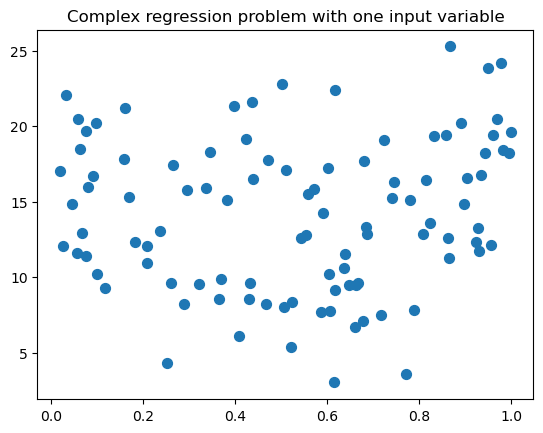

In [72]:
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100, n_features = 7, random_state = 0)

plt.scatter(X_F1[:,2], y_F1, marker = 'o', s = 50)
plt.show()


In [73]:
from sklearn.preprocessing import PolynomialFeatures

X_train, X_test, y_train, y_test = train_test_split(X_F1, y_F1, random_state=0)
linreg = LinearRegression().fit(X_train, y_train)

print((linreg.coef_,linreg.intercept_,linreg.score(X_train,y_train),linreg.score(X_test,y_test))) # w (w0) and b

(array([ 4.42036739,  5.99661447,  0.52894712, 10.23751345,  6.5507973 ,
       -2.02082636, -0.32378811]), 1.5425091975373046, 0.7223750207373036, 0.7221339576925414)


In [74]:
poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(X_F1)

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1, random_state=0)
linreg = LinearRegression().fit(X_train, y_train)

print((linreg.coef_,linreg.intercept_,linreg.score(X_train,y_train),linreg.score(X_test,y_test))) # w (w0) and b

(array([ 3.40951018e-12,  1.66452443e+01,  2.67285381e+01, -2.21348316e+01,
        1.24359227e+01,  6.93086826e+00,  1.04772675e+00,  3.71352773e+00,
       -1.33785505e+01, -5.73177185e+00,  1.61813184e+00,  3.66399592e+00,
        5.04513181e+00, -1.45835979e+00,  1.95156872e+00, -1.51297378e+01,
        4.86762224e+00, -2.97084269e+00, -7.78370522e+00,  5.14696078e+00,
       -4.65479361e+00,  1.84147395e+01, -2.22040650e+00,  2.16572630e+00,
       -1.27989481e+00,  1.87946559e+00,  1.52962716e-01,  5.62073813e-01,
       -8.91697516e-01, -2.18481128e+00,  1.37595426e+00, -4.90336041e+00,
       -2.23535458e+00,  1.38268439e+00, -5.51908208e-01, -1.08795007e+00]), -3.20567439892916, 0.9685996830172934, 0.804643755050998)


In [95]:
linridge = Ridge(alpha=0.25).fit(X_train,y_train)
print((linridge.coef_,linridge.intercept_,linridge.score(X_train,y_train),linridge.score(X_test,y_test)))

(array([ 0.        ,  4.69815687, 10.29124054, -7.87935817,  5.78555383,
        2.51244645, -1.13138972,  0.56054242, -4.94312361,  1.23062545,
        2.10452099,  3.85126769,  4.06865311,  0.57754355, -3.20739215,
       -5.20732415,  1.60601081, -0.57996611, -1.76984557,  3.93035938,
       -3.007731  ,  7.84287685, -2.09153069,  1.10348375, -4.22520364,
        2.78786532,  3.7548374 ,  1.48099376,  0.26394436, -1.59732754,
        1.87165068, -3.79360891,  1.48418621,  0.92114103,  4.51483799,
       -1.37882433]), 3.632507682355298, 0.9079732818307384, 0.852084364529633)


In [97]:
linlasso = Lasso(alpha=0.01,max_iter=10000).fit(X_train,y_train)
print((linlasso.coef_,linlasso.intercept_,linlasso.score(X_train,y_train),linlasso.score(X_test,y_test),np.sum(linlasso.coef_!=0)))

(array([ 0.00000000e+00,  1.04312916e+01,  2.39389194e+01, -1.47827871e+01,
        8.29587058e+00,  2.52947834e+00,  0.00000000e+00,  0.00000000e+00,
       -7.95125942e+00, -4.55873307e-02,  5.03940982e-01,  1.47040458e+00,
        5.11842620e+00,  0.00000000e+00, -1.00078820e+00, -1.40333113e+01,
        0.00000000e+00, -1.35801661e+00, -4.27758814e-01,  0.00000000e+00,
       -5.08973700e+00,  1.45212611e+01, -5.67435316e-03,  9.74633225e-01,
       -2.23035053e+00,  1.38040727e+00,  1.30133421e+00,  0.00000000e+00,
        3.15698904e-01, -0.00000000e+00,  0.00000000e+00, -5.00376839e-01,
        0.00000000e+00,  0.00000000e+00,  2.46508083e+00,  0.00000000e+00]), 0.6170800736334794, 0.9464381627866986, 0.9155918776246514, 24)
